# Исследование надёжности заёмщиков

**Заказчик** — кредитный отдел банка. 

**Входные данные от банка** — статистика о платёжеспособности клиентов. 


**Цель исследования** ответить на вопрсы:  
- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

**Результаты исследования** будут учтены при построении модели *кредитного скоринга* — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.  

**Ход исследования**
Данные о поведении пользователей получаем из файла `/datasets/data.csv` (данные Яндекс Практикума). О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 
Таким образом, исследование пройдёт по следующим этапам:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.
 4. Общий вывод


## Обзор данных

In [74]:
# импорт необходимых библиотек
import matplotlib.pyplot as plt
from pymystem3 import Mystem
import pandas as pd
import seaborn as sns

In [75]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('***')

In [76]:
# получение первых 10 строк таблицы df
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [77]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице двенадцать столбцов.

Согласно документации к данным:
* `children` — количество детей в семье; Тип данных `int64`
* `days_employed` — общий трудовой стаж в днях; Тип данных `float64`
* `dob_years` — возраст клиента в годах; Тип данных `int64`
* `education` — уровень образования клиента; Тип данных `object`
* `education_id` — идентификатор уровня образования; Тип данных `int64`
* `family_status` — семейное положение; Тип данных `object`
* `family_status_id` — идентификатор семейного положения; Тип данных `int64`
* `gender` — пол клиента; Тип данных `object`
* `income_type` — тип занятости; Тип данных `object`
* `debt` — имел ли задолженность по возврату кредитов; Тип данных `int64`
* `total_income` — ежемесячный доход; Тип данных `float64`
* `purpose` — цель получения кредита; Тип данных `object`

В названиях колонок нарушений стиля нет. 
Названия колонок соответствуют документации.  
Типы данных соответствуют содержимому столбца, указанному в документации, кроме столбца `days_employed`, надо заменить тип float64 на int64.  
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.  
В столбце `days_employed` встречаются отрицательные значения.  
В столбце `education` необходимо привести все данные к нижнему регистру.  
В столбце `purpose` необходимо провести лемматизацию целей кредита, в настоящее время одинаковые по смыслу цели зафиксированы разным текстом.


**Выводы**

В каждой строке таблицы — данные о клиенте.   
Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных. 

*Необходимо*:  

    - проанализировать и заполнить пропуски в данных  
    - проверить наличие дубликатов, при необходимости удалить  
    - изменить тип данных по столбцу `days_employed`  
    - лемантизировать столбец `purpose`  
    - проанализировать данные на наличие артефактов.  
    - оценить какие данные и как стоит категоризировать для достижения цели исследования  

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Обработка пропусков и анализ отрицательных значений


In [78]:
# подсчёт пропусков 
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [79]:
# доля пропусков
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [80]:
# создадим датафрейм, в котором пропущенны одновременно данные и по столбцу days_employed и по столбцу total_income.
# посмотрим размер данного датафрейма
df_nan = df[(df['days_employed'].isna()) & (df['total_income'].isna())]
df_nan.shape

(2174, 12)

Все пропущенные значения по столбцам `days_employed` и `total_income` совпадают построчно и соствляют 10% общего количества записей в исходных данных (2174 шт.).  
Посмотрим пропуски в разрезе категорий количества детей, образования, семейного положения, пола, типа дохода, статуса возврата кредита.

In [81]:
# рассчитаем отношение количества пропусков в разрезе категорий к общему количеству данных в разрезе категорий.
for i in['children', 'education_id', 'family_status_id', 'gender', 'income_type', 'debt']:  
        display(df_nan[i].value_counts()/df[i].value_counts()*100)
        print()

-1      6.382979
 0     10.170330
 1      9.858863
 2      9.927007
 3     10.909091
 4     17.073171
 5     11.111111
 20    11.842105
Name: children, dtype: float64

0    10.342205
1    10.109630
2     9.274194
3     7.446809
4          NaN
Name: education_id, dtype: float64

0     9.991922
1    10.581757
4    10.238180
3     9.372385
2     9.895833
Name: family_status_id, dtype: float64

F      10.424276
M       9.467618
XNA          NaN
Name: gender, dtype: float64

безработный              NaN
в декрете                NaN
госслужащий        10.075394
компаньон           9.990167
пенсионер          10.710581
предприниматель    50.000000
сотрудник           9.937944
студент                  NaN
Name: income_type, dtype: float64

0    10.129397
1     9.764503
Name: debt, dtype: float64

По большинству категорий пропуски составляют около 10%, соответственно это не 'сбой'  по какойто конкретной категории, а все пропуски распределены пропорционально в разрезе категорий по всему ДатаФрейму.  
Возможно один из источников данных не выгружает данные показатели или выгружает в ошибочном формате, что данные не сохранились, возможно эти данные закрыты правами доступа для выгрузки в данном источнике.  
Необходимо проверить информацию по предпринимателям(пропуски составляю 50%)

In [82]:
# посмотрим данные из исходного датафрейма только по предпринимателям
df[df['income_type']=='предприниматель']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5936,0,NaN,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости
18697,0,-520.848083,27,высшее,0,гражданский брак,1,F,предприниматель,0,499163.144947,на проведение свадьбы


Так как в базе всего 2 предпринимателя, по одному из них есть информация, по второму пропуск, то и появляется 50% пропуска.  
Можно подтвердить вывод , что все пропуски распределены пропорционально в разрезе категорий по всему ДатаФрейму.

In [83]:
# функция для проверки наличия отрицательных значений в столбцах
def check_negative(data):
    count = 0
    for i in data:
        if i < 0:
            count += 1
    return count        
            

In [84]:
# список столбцов, по которым проверим наличие отрицательных значений
check_list_negative = ['children', 'days_employed', 'dob_years', 'total_income']

In [85]:
# рассчитаем количество и долю отрицательных значений в столбцах из списка
for i in check_list_negative:
    print(f'Количество отрицательных значений в столбце {i}: {check_negative(df[i])}')
    print(f'Доля отрицательных значений в столбце {i}: {round(check_negative(df[i])/df.shape[0],2)}')

Количество отрицательных значений в столбце children: 47
Доля отрицательных значений в столбце children: 0.0
Количество отрицательных значений в столбце days_employed: 15906
Доля отрицательных значений в столбце days_employed: 0.74
Количество отрицательных значений в столбце dob_years: 0
Доля отрицательных значений в столбце dob_years: 0.0
Количество отрицательных значений в столбце total_income: 0
Доля отрицательных значений в столбце total_income: 0.0


**Обратим внимание, что доля отрицательных значений в столбце days_employed: 0.74 , т.е. наибольшая часть данных по столбцу имеет отрицательное значение**

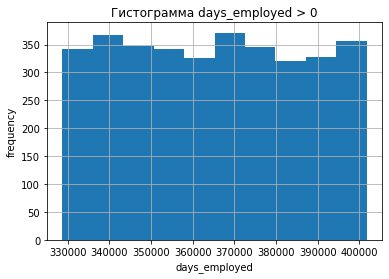

In [86]:
# построим гистограмму распределения по столбцу 'days_employed' по положительным значениям
%matplotlib inline

df[df['days_employed'] > 0]['days_employed'].hist()
plt.xlabel('days_employed')
plt.ylabel('frequency')
plt.title("Гистограмма days_employed > 0")
plt.show()

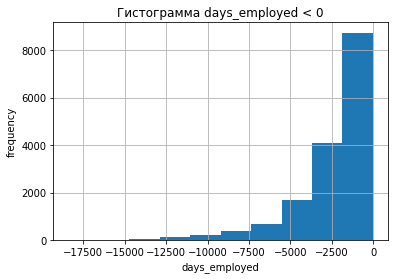

In [87]:
# построим гистограмму распределения по столбцу 'days_employed' по отрицательным значениям 

df[df['days_employed'] < 0]['days_employed'].hist()
plt.xlabel('days_employed')
plt.ylabel('frequency')
plt.title("Гистограмма days_employed < 0")
plt.show()

Проверим гипотезу влиняия `income_type` на `days_employed` (тип занятости на трудовой стаж)

In [88]:
# все возможные виды занятости
list(df['income_type'].unique())

['сотрудник',
 'пенсионер',
 'компаньон',
 'госслужащий',
 'безработный',
 'предприниматель',
 'студент',
 'в декрете']

In [89]:
# 6 типов занятости с отрицательным значением стажа
df[df['days_employed'] < 0].groupby('income_type')['income_type'].count()

income_type
в декрете              1
госслужащий         1312
компаньон           4577
предприниматель        1
сотрудник          10014
студент                1
Name: income_type, dtype: int64

In [90]:
# 2 типа занятости с положительным значением стажа
df[df['days_employed'] > 0].groupby('income_type')['income_type'].count()

income_type
безработный       2
пенсионер      3443
Name: income_type, dtype: int64

Похоже, что в предоставленных данных знак значения общего трудового стажа для пенсионеров и безработных положительный, а для тех , кто в настоящее время работает/учится ( в процессе накопления трудового стажа) , отрицательный. 

Посмотрим зависимсоть трудового стажа и возраста клиента в разрезе двух групп: пенсионеры-безработны и все остальные.

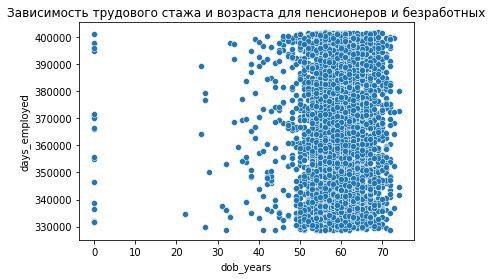

In [91]:
plt.title("Зависимость трудового стажа и возраста для пенсионеров и безработных")
sns.scatterplot(x=df[(df['income_type']=='пенсионер') | (df['income_type']=='безработный')]['dob_years'],
                y=df[(df['income_type']=='пенсионер') | (df['income_type']=='безработный')]['days_employed'])
plt.show()

Судя по графику, по группе пенсионеры и безработные зависимости трудового стажа и возраста нет, поэтому для заполнения пропусков для категории пенсионеров и безработных берем среднее значение трудового стажа из положитеьных данных  

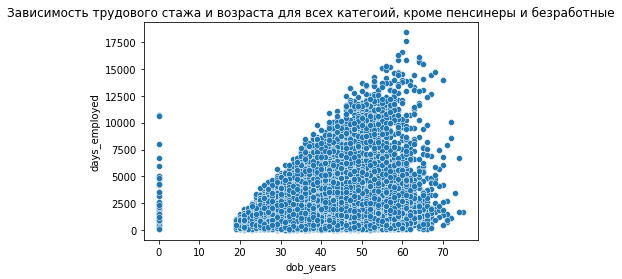

In [92]:
plt.title("Зависимость трудового стажа и возраста для всех категоий, кроме пенсинеры и безработные")
sns.scatterplot(x=df[(df['income_type'] != 'пенсионер') & (df['income_type'] != 'безработный')]['dob_years'],
                y=-df[(df['income_type'] != 'пенсионер') & (df['income_type'] != 'безработный')]['days_employed'])
plt.show()

По группе всех , у кого тип дохода не пенсионер и не безработный наблюдается зависимость , чем старше человек, тем шире диапозон возможных значений трудового стажа, поэтому при заполнении пропущенных значений правильнее разбить данные на категории по возрасту, и заполнять стаж, как среднее для конкретной категории возраста. В связи с тем , что среди целей исследования нет необходимости оценки влияния стажа на возврат кредита, заполним пропущенные значения средним значение трудового стажа из отрицательных данных, не учитывая влияние возраста.

Поэтому **для заполнения пропущенных значений по столбцу 'days_employed'**:  
- для категории пенсионеров и безработных берем среднее значение трудового стажа из положитеьных данных столбца 'days_employed'
- для прочих категорий среднее значение трудового стажа из отрицательных данных.
Далее все отрицательные значения преобразуем в положительные.

In [93]:
# берем абсолютные значения признака
df.days_employed = df.days_employed.abs()

In [94]:
df.days_employed = df.days_employed.fillna(df.groupby('income_type')['days_employed'].transform('mean'))

In [95]:
# проверим 12,26 строчку
df.iloc[[12,26],:]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,365003.491245,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,3399.896902,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование


Согласно предоставленной документации столбец days_employed это общий трудовой стаж в днях, у пенсионеров и безработных среднее значение по данному столбцу составляет 365004 дня, это более 1000 лет, в случае необходимости дальнейшего изучения влияния стажа на возврат кредита **неободимо запросить дополнительную информацию** по заполнению данного столбца.




Для заполнения пропущенных значений в столбце `total_income` рассмотрим влияние количества детей, возраста, наличия образования, семейного статуса, пола, типа дохода на данный столбец

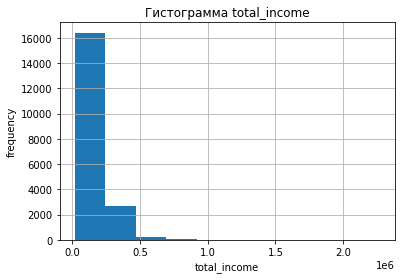

In [96]:
# построим гистограмму распределения дохода
df['total_income'].hist()
plt.xlabel('total_income')
plt.ylabel('frequency')
plt.title("Гистограмма total_income")
plt.show()

у большинства клиентов доход до 250 тыс.

In [97]:
# расчет 'разброса' дохода по группировкам в разрезе перечисленных ниже столбцов
# расчитываем среднии величины по доходу в разрезе категорий столбца, и из максимального значения 
# вычитаем минимальное, что бы выявить те столбцы, в рамках которых средний доход сильно 
# варьируется в зависимости от категории.
for i in ['children','education_id','family_status_id','gender','income_type']: 
    print(i)
    print(int((df.groupby(i)['total_income'].mean()).max()-(df.groupby(i)['total_income'].mean()).min()))
    print()


children
29403

education_id
74987

family_status_id
26282

gender
49807

income_type
445334



In [98]:
df.groupby('income_type')['total_income'].mean()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        170898.309923
компаньон          202417.461462
пенсионер          137127.465690
предприниматель    499163.144947
сотрудник          161380.260488
студент             98201.625314
Name: total_income, dtype: float64

Согласно полученным данным, самое существенное влияние на доход имеет `income_type` 445 тыс.(в декрете средний доход 53,8 тыс, а у предпринимателя 499 тыс). Поэтому при расчете `total_income` нужно учитывать влияние `income_type`

Для оценки влияния возраста разделим возраст на пять категорий:0-20, 21-40, 41-60, 61-80, 80 и старше

In [99]:
# функция для категоризации по возрасту
def old_cat(i):    
    if i <= 20:
        return 0
    elif 21 <= i <= 40:
        return 1
    elif 41 <= i <= 60:
        return 2
    elif 61 <= i <= 80:
        return 3
    return 4

In [100]:
# добавим категориальный столбец для возраста
df['dob_years_cat'] = df['dob_years'].apply(old_cat)
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,2
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,1
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,1
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,1
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,2


In [101]:
# расчитаем 'разброс' дохода по группировкам в разрезе возрастных категорий
print(int((df.groupby('dob_years_cat')['total_income'].mean()).max()-(df.groupby('dob_years_cat')['total_income'].mean()).min()))

27275


'разброс' дохода по группировке в разрезе групп возраста составляет всего 27 тыс. Поэтому для расчета пропущенных значений по столбцу доходов будем учитывать только влияние столбца тип дохода.


In [102]:
df[df['total_income'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat
12,0,365003.491245,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу,3
26,0,3399.896902,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование,2
29,0,365003.491245,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости,3
41,0,3399.896902,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем,2
55,0,365003.491245,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу,2


In [103]:
# заполняем пропущенные значения средним значением дохода в разрезе категорий типа дохода
for i in df['income_type'].unique():
    df.loc[df['income_type'] == i,'total_income'] =  df.loc[df['income_type'] == i,'total_income'].fillna(df[df['income_type'] == i]['total_income'].mean())

In [104]:
# проверяем несколько строк
df.iloc[[12,26,29,41,55],:]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat
12,0,365003.491245,65,среднее,1,гражданский брак,1,M,пенсионер,0,137127.465690,сыграть свадьбу,3
26,0,3399.896902,41,среднее,1,женат / замужем,0,M,госслужащий,0,170898.309923,образование,2
29,0,365003.491245,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,137127.465690,строительство жилой недвижимости,3
41,0,3399.896902,50,среднее,1,женат / замужем,0,F,госслужащий,0,170898.309923,сделка с подержанным автомобилем,2
55,0,365003.491245,54,среднее,1,гражданский брак,1,F,пенсионер,1,137127.465690,сыграть свадьбу,2


In [105]:
# проверим, что больше не осталось пустых значений
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dob_years_cat       0
dtype: int64

В связи с тем, что одна из целей исследования влияние наличий детей на возврат кредита, необходимо проверить значения по столбцу `children`

In [106]:
# доля каждой категории в общем датафрейме
df['children'].value_counts()/df.shape[0]

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

значения 20 и -1 являются артефактами в данном датафрейме, доля данных категорий суммарно 0.57% в общем датафрейме, поэтому при расчете влияния наличия детей на возврат кредита данные строчки учитывать не надо.

In [107]:
# рассчитаем долю данных с нулевым возрастом в датафрейме
df[df['dob_years']==0]['dob_years'].count()/df.shape[0]*100


0.4692218350754936

В процессе анализа были обнаружены данные с нулевым возрастом 0.47% в общем датафрейме. Влияние возраста на возврат кредита не является целью данного исследования, поэтому данный артефакт оставляем в датафрейме

In [108]:
# посмотрим значения в столбце образование
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

In [109]:
# приведем все слова к нижнему регистру
df['education'] = df['education'].str.lower()

In [110]:
# проверим
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

**Вывод**

Для заполнения пропущенных значений по столбцу `days_employed`:

- категории пенсионеров и безработных берем среднее значение трудового стажа из положитеьных данных столбца 'days_employed'
- прочих категорий среднее значение трудового стажа из отрицательных данных. Далее все отрицательные значения были преобразованы в положительные.  

Необходимо получить дополнительную консультацию у источника предоставления данных по данному столбцу, так как по категории пенсионеры и безработные стаж в днях при переводе в года составляет более 1000 лет. Для целей данного исследования данный столбец не актуален.

Для расчета пропущенных значений по столбцу `total_income` учитывалось только влияние столбца тип дохода. Пропущенные значения заполнены средними значениями дохода в разрезе категорий столбца тип дохода.

При расчете влияния наличия детей на возврат кредита значения по столбцу количество детей 20 и -1 не учитывать.  

В процессе анализа были обнаружены данные с нулевым возрастом , так как влияние возраста на возврат кредита не является целью данного исследования, поэтому данный артефакт оставляем в датафрейме.

Столбец `education` приведен к единому формату в нижнем регистре.

### Замена типа данных

`days_employed` — общий трудовой стаж в днях; Тип данных `float64` необходимо заменить на int.  
Применим метод .astype(). Данный метод позволяет четко указать тип данных, который мы хотим иметь в своем DataFrame или Series. Он очень универсален в том, что мы можем попробовать перейти от одного типа к другому.

In [111]:
df['days_employed'] = df['days_employed'].astype('int')

In [112]:
df['total_income'] = df['total_income'].astype('int')

In [113]:
# проверим, что тип данных в столбце days_employed изменился
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
 12  dob_years_cat     21525 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 2.1+ MB


**Вывод**

По столбцам `days_employed` и `total_income` изменен тип данных на целочисленный

### Обработка дубликатов

In [114]:
# посчитаем количество явных дубликатов
df.duplicated().sum()

71

In [115]:
# удалим дубликаты
df = df.drop_duplicates().reset_index(drop=True)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,2
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,1
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,1
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,1
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,2
21450,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,3
21451,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,1
21452,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,1


In [116]:
# посмотрим значения, которые указаны в столбце purpose
df['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

**Вывод**

Удален 71 явный дубликат
Необходимо лемантизировать данные столбца `purpose` и повторно удалить дубликаты из датафрейма.  
Причинами возникновения дубликатов может быть повторная выгрузка из одного и того же источника данных, пересечение информации в различных источниках данных, ошибка при слиянии нескольких источников в единый файл .csv

### Лемматизация

In [117]:
# создадим объект класса Mystem из библиотеки pymystem3
m = Mystem()

In [118]:
# лемматизируем столбец purpose
df['purpose'] = df['purpose'].apply(m.lemmatize)

In [122]:
df['purpose'].apply(lambda x: ' '.join(x)).value_counts()

автомобиль \n                                    972
свадьба \n                                       791
на   проведение   свадьба \n                     768
сыграть   свадьба \n                             765
операция   с   недвижимость \n                   675
покупка   коммерческий   недвижимость \n         661
операция   с   жилье \n                          652
покупка   жилье   для   сдача \n                 651
операция   с   коммерческий   недвижимость \n    650
покупка   жилье \n                               646
жилье \n                                         646
покупка   жилье   для   семья \n                 638
строительство   собственный   недвижимость \n    635
недвижимость \n                                  633
операция   со   свой   недвижимость \n           627
строительство   жилой   недвижимость \n          624
покупка   недвижимость \n                        621
покупка   свой   жилье \n                        620
строительство   недвижимость \n               

In [123]:
# сформируем список целей кредита. Данный список будет является категориями столбца purpose,
# кроме 'жилье'('жилье' и 'недвижимость' будет одной категорией)
purpose_list = ['автомобиль','свадьба','строительство','ремонт','образование','жилье','недвижимость']

In [124]:
# функция для преобразования списка лемматизированных слов в категорию для столбца purpose
def purpose_update(arr):
    purpose_list = ['автомобиль','свадьба','строительство','ремонт','образование','жилье','недвижимость']
    for i in purpose_list:
        if i in arr:
            if i == 'жилье':
                return 'недвижимость'
            return i

In [125]:
# применим функцию для категоризации столбца purpose
df['purpose'] = df['purpose'].apply(purpose_update)

In [126]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cat
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,недвижимость,2
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,1
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,недвижимость,1
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,1
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,2


In [127]:
# посмотрим на значения столбца purpose и количество наблюдений в разрезе данных значений
df['purpose'].value_counts()

недвижимость     8326
автомобиль       4306
образование      4013
свадьба          2324
строительство    1878
ремонт            607
Name: purpose, dtype: int64

In [128]:
# проверим количество дубликатов после преобразования столбца цели кредита
df.duplicated().sum()

254

In [129]:
# удалим дубликаты
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(21200, 13)

**Вывод**

После лемматизации и унификации столбца `purpose` было выявлено и удалено еще 254 дубликата в датафрейме

### Категоризация данных

In [130]:
# создадим датафрейм соответствия education и education_id
df_education = df.loc[:,['education','education_id']].drop_duplicates().reset_index(drop=True)

In [131]:
df_education

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [132]:
# создадим датафрейм соответствия family_status и family_status_id
df_family_status = df.loc[:,['family_status','family_status_id']].drop_duplicates().reset_index(drop=True)

In [133]:
df_family_status


,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


Разобьем на категории уровень дохода


In [134]:
# посмотрим основные статистические показатели по столбцу total_income, для выделения оптимальных групп при категоризации
df['total_income'].describe().apply("{0:.2f}".format)

count      21200.00
mean      167533.80
std        98619.60
min        20667.00
25%       106967.25
50%       151396.50
75%       202417.00
max      2265604.00
Name: total_income, dtype: object

In [135]:
# функция для категоризации дохода
def income_cat(i):    
    if i <= 95000:
        return 'Доход менее 95 тыс.'
    elif 95001 <= i <= 125000:
        return 'Доход более 95 тыс. и менее 125 тыс.'
    elif 125001 <= i <= 155000:
        return 'Доход более 125 тыс. и менее 155 тыс.'
    elif 155001 <= i <= 185000:
        return 'Доход более 155 тыс. и менее 185 тыс.'
    elif 185001 <= i <= 215000:
        return 'Доход более 185 тыс. и менее 215 тыс.'
    return 'Доход более 215 тыс.'

In [136]:
# применим функцию категоризации дохода к столбцу total_income, создадим отдельный столбец, что бы не потерять данные о доходе
df['total_income_cat'] = df['total_income'].apply(income_cat)

In [137]:
# посмотрим значение и количество наблюдений в разрезе каждой категории по доходу. проверим сопоставимость категорий.
df['total_income_cat'].value_counts()

Доход более 215 тыс.                     4270
Доход менее 95 тыс.                      3891
Доход более 155 тыс. и менее 185 тыс.    3690
Доход более 125 тыс. и менее 155 тыс.    3575
Доход более 95 тыс. и менее 125 тыс.     3478
Доход более 185 тыс. и менее 215 тыс.    2296
Name: total_income_cat, dtype: int64

Все категории примерно одного размера

In [138]:
# создадим датафрейм для последующей работы, удалим из текущего дублирующиеся столбцы(education, family_status, total_income) 
data = df.loc[:,['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'gender', 'income_type', 'debt','total_income_cat', 'purpose',]]

In [139]:
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income_cat,purpose
0,1,8437,42,0,0,F,сотрудник,0,Доход более 215 тыс.,недвижимость
1,1,4024,36,1,0,F,сотрудник,0,Доход более 95 тыс. и менее 125 тыс.,автомобиль
2,0,5623,33,1,0,M,сотрудник,0,Доход более 125 тыс. и менее 155 тыс.,недвижимость
3,3,4124,32,1,0,M,сотрудник,0,Доход более 215 тыс.,образование
4,0,340266,53,1,1,F,пенсионер,0,Доход более 155 тыс. и менее 185 тыс.,свадьба


**Вывод**

Созданы таблицы соответствия образования и семейного положения(df_education, df_family_status).  
Категоризирован уровень дохода, для дальнейшего использования при выявлении влияния дохода на возврат кредита.  
Создан датафрейм для дальнейшей работы (data)

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [140]:
# посмотрим статистику возврата кредитов
data['debt'].value_counts()

0    19460
1     1740
Name: debt, dtype: int64

из 20 тыс наблюдений 19 тыс не имели задолженности по возврату кредита и у 1,7 тыс наблюдений были проблемы с возвратом кредита.
Посмотри , как на возврат кредита влияет наличие детей

In [141]:
# функция для определения наличия детей
def children_status(num):
    if num == 0:
        return 'детей нет'
    elif num == -1 or num == 20:
        return 'ошибка'
    return 'дети есть'

In [142]:
# добавим столбец с признаком наличия детей
data['children_status'] = data['children'].apply(children_status)

In [143]:
# создадим функцию для группировки данных
# сгруппируем данные по col и возврату/невозврату кредита.
# count покажет общее количество наблюдений в данной категории 
# sum просуммирует все единички (т.е. невозвраты) и мы получим количество наблюдений, по которым был невозврт кредита.
# сохраним полученные данные в ДатаФрейм
# рассчитаем % невозврата в каждой группе gj col и сохраним результат в столбец debt_ratio
# рачсчитаем % невозврата в разрезе групп col
# для этого количество невозврата по данной группе разделим на общее количество невозратов
def data_group(data,col):
    data_debt = data.groupby(col)['debt'].agg(['count','sum'])
    data_debt['debt_ratio'] = data_debt['sum']/data_debt['count']*100
    data_debt['debt_group']=data_debt['sum']/data['debt'].sum()*100
    return data_debt
    

In [144]:
data_children_debt = data_group(data,'children_status')

In [145]:
data_children_debt

,count,sum,debt_ratio,debt_group
children_status,,,,
детей нет,13889,1062,7.646339,61.034483
дети есть,7188,669,9.307179,38.448276
ошибка,123,9,7.317073,0.517241


**Вывод**

**Существует небольшая зависимости между наличием детей и возвратом кредита в срок**, в группе "детей нет" не возвращают примерно 7,6 % , а в группе "дети есть" 9%. Т.е. наличие детей отрицательно сказывается на возвратность кредитов. 61% всех невозвратов приходится на группу "детей нет", но это связано с тем , что данная группа почти в 2 раза больше, чем группа "дети есть".

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [146]:
data_family_status_debt = data_group(data,'family_status_id')

In [147]:
data_family_status_debt

,count,sum,debt_ratio,debt_group
family_status_id,,,,
0,12143,930,7.658733,53.448276
1,4125,388,9.406061,22.298851
2,948,63,6.645570,3.620690
3,1193,85,7.124895,4.885057
4,2791,274,9.817270,15.747126


In [148]:
df_family_status

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


**Вывод**

Самыми благонадежными заемщиками являеся категория 'вдова/вдовец'(всего 6,6% невозврата в рамках категории), у категорий 'в разводе' и 'женат' данный показатель чуть больше 7% и самыми неблагонадежными являются ватегории 'не женат' и 'гражданский брак' (более 9%). Зависимость скорее всего существует, но показатель по категории вдова/вдовец скорее всего не репрезентативный, так как это самая малочисленная группа (всего 948 человек 21.2 тыс наблюдений).

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [149]:
data_total_income_debt = data_group(data,'total_income_cat')

In [150]:
data_total_income_debt

,count,sum,debt_ratio,debt_group
total_income_cat,,,,
Доход более 125 тыс. и менее 155 тыс.,3575,313,8.755245,17.988506
Доход более 155 тыс. и менее 185 тыс.,3690,336,9.105691,19.310345
Доход более 185 тыс. и менее 215 тыс.,2296,184,8.013937,10.574713
Доход более 215 тыс.,4270,299,7.002342,17.183908
Доход более 95 тыс. и менее 125 тыс.,3478,296,8.510638,17.011494
Доход менее 95 тыс.,3891,312,8.018504,17.931034


**Вывод**

Существует незначительное влияние дохода на возрат кредита.  
При росте дохода до 185 тыс растет процент невозрата с 8% (для дохода до 95 тыс.) до 8,7% (для дохода от 155 тыс до 185 тыс).  
При дальнейшем росте дохода процент невозрата падает до 7% ( для дохода более 215 тыс)

- Как разные цели кредита влияют на его возврат в срок?

In [151]:
data_purpose_debt = data_group(data,'purpose')

In [152]:
data_purpose_debt

,count,sum,debt_ratio,debt_group
purpose,,,,
автомобиль,4272,402,9.410112,23.103448
недвижимость,8180,603,7.371638,34.655172
образование,3964,370,9.334006,21.264368
ремонт,607,35,5.766063,2.011494
свадьба,2306,186,8.065915,10.689655
строительство,1871,144,7.696419,8.275862


В связи с тем , что категория ремонт очень незначительна и по смыслу близка к категории строительство, попробуем их объединить и рассчитать процент невозврата кредита по полученной суммарной категрии.

In [153]:
# рассчитаем процент невозврата кредита , если объединить категорию ремонт и строительство
(data_purpose_debt.iloc[3,1]+data_purpose_debt.iloc[5,1])/(data_purpose_debt.iloc[3,0]+data_purpose_debt.iloc[5,0])*100

7.223567393058919

**Вывод**

Существует незначительное влияние цели кредита на его возрат. Для кредитов на недвижимость,ремонт,строительство невозвратность кредита составляет около 7%. Для кредитов на расходы на свадьбу 8%. Для автокредитов и кредитов на образование невозвратность составляет более 9%.

## Шаг 4. Общий вывод

Проверены четыре гипотезы:
1. *Есть ли зависимость между наличием детей и возвратом кредита в срок?*  
Незначительная зависимость существует, наличие детей отрицательно сказывается на возвратность кредитов  

2. *Есть ли зависимость между семейным положением и возвратом кредита в срок?*  
Самыми благонадежными заемщиками являеся категория 'вдова/вдовец', 'в разводе', 'женат'(около 7% невозрата). Самыми неблагонадежными являются категории 'не женат' и 'гражданский брак' (более 9% невозвратов). 

3. *Есть ли зависимость между уровнем дохода и возвратом кредита в срок?*  
При росте дохода до 185 тыс растет процент невозрата с 8% (для дохода до 95 тыс.) до 8,7% (для дохода от 155 тыс до 185 тыс).  
При дальнейшем росте дохода процент невозрата падает до 7% ( для дохода более 215 тыс)

4. *Как разные цели кредита влияют на его возврат в срок?*    
Для кредитов на недвижимость, ремонт, строительство невозвратность кредита составляет около 7%. Для кредитов на расходы на свадьбу 8%. Для автокредитов и кредитов на образование невозвратность составляет более 9%

**При построении модели кредитного скоринга рекомендуется учитывать все данные факторы, рассмотренные выше: наличие детей, семейное положение, уровень дохода, цель кредита.**